In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the data
movies = pd.read_csv('tmdb_all_movies.csv')
movies.head()

,id,title,date_string,language,genre,duration,rating,rating_count,cast1,cast2,cast3,director,budget,box_office,spoken_languages
0,195583,Launching a Stranded Schooner from the Docks,1900-09-21,en,NaN,1,3.600,5,NaN,NaN,NaN,Albert E. Smith,0,0,NaN
1,755957,Panorama of East Galveston,1900-09-16,en,99,2,0.000,0,NaN,NaN,NaN,Albert E. Smith,0,0,NaN
2,195641,The Clown and the Alchemist,1900-11-21,en,35,2,3.944,9,NaN,NaN,NaN,Albert E. Smith,0,0,No Language
3,195631,Hooligan Assists the Magician,1900-11-01,en,"14,35",2,4.300,7,J. Stuart Blackton,NaN,NaN,J. Stuart Blackton,0,0,No Language
4,195553,"Panorama of Orphans' Home, Galveston",1900-09-21,en,NaN,1,4.000,5,NaN,NaN,NaN,Albert E. Smith,0,0,NaN


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25200 non-null  int64  
 1   title             25200 non-null  object 
 2   date_string       25200 non-null  object 
 3   language          25200 non-null  object 
 4   genre             22837 non-null  object 
 5   duration          25200 non-null  int64  
 6   rating            25200 non-null  float64
 7   rating_count      25200 non-null  int64  
 8   cast1             23539 non-null  object 
 9   cast2             22856 non-null  object 
 10  cast3             22295 non-null  object 
 11  director          24409 non-null  object 
 12  budget            25200 non-null  int64  
 13  box_office        25200 non-null  int64  
 14  spoken_languages  22163 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 2.9+ MB


In [9]:
corr_matrix = movies.corr(numeric_only=True)
print(corr_matrix["box_office"].sort_values(ascending=False))
print("======\n")
print(corr_matrix["rating"].sort_values(ascending=False))
print("======\n")

print(corr_matrix["rating_count"].sort_values(ascending=False))
print("======\n")

print(corr_matrix["duration"].sort_values(ascending=False))


box_office      1.000000
budget          0.777948
rating_count    0.771094
rating          0.231883
duration        0.193507
id             -0.150842
Name: box_office, dtype: float64

rating          1.000000
duration        0.333658
rating_count    0.303516
budget          0.255397
box_office      0.231883
id             -0.580161
Name: rating, dtype: float64

rating_count    1.000000
box_office      0.771094
budget          0.667073
rating          0.303516
duration        0.231459
id             -0.209475
Name: rating_count, dtype: float64

duration        1.000000
rating          0.333658
rating_count    0.231459
budget          0.226041
box_office      0.193507
id             -0.251941
Name: duration, dtype: float64


In [11]:
print(movies.isnull().sum())
print(movies.dtypes)
#movies.drop('source_genre',axis=1,inplace=True)
# extract numerical and categorical attributes into separate dataframes
# movies_num = movies.select_dtypes(include=[np.number])
# movies_cat = movies.select_dtypes(include=['object'])
# obtain the column names of the numerical and categorical attributes
# num_attribs = list(movies_num)
# cat_attribs = list(movies_cat)
print("movies num before is {}".format(len(movies)))

# Deal with numerical attributes

movies['budget'] = movies['budget'].replace(0, np.nan)
movies['box_office'] = movies['box_office'].replace(0, np.nan)
# movies_num[['budget', 'box_office']] = movies_num[['budget', 'box_office']].replace(0, np.nan)
print("mid movies")
print(movies)
num_imputer= SimpleImputer(strategy='constant', fill_value=None)
num_imputer.fit_transform(movies)
movies = movies.dropna()
print("movies_num is")
print(len(movies))


# Delete unreasonable durations
movies = movies[(movies['duration'] > 30) & (movies['duration'] < 300)]
movies = movies[(movies['box_office'] > 10000)]

# deal with categorical attributes
# imputer = SimpleImputer(strategy="most_frequent")
# imputer.fit_transform(movies)
movies['date_string'] = pd.to_datetime(movies['date_string'], errors='coerce')
# Handle genre column with One-Hot Encoding
dummies = movies['genre'].str.get_dummies(sep=',')
dummies.columns = [f"genre_{col}" for col in dummies.columns]
movies = movies.join(dummies)

# Add profit column
movies['profit'] = movies['box_office'] - movies['budget']

# Extract release year
movies['release_year'] = movies['date_string'].dt.year


# Remove duplicates
movies.drop_duplicates(inplace=True)

# Validate cleaned data
print(movies.info())
print(movies.head())

id                     0
title                  0
date_string            0
language               0
genre               2363
duration               0
rating                 0
rating_count           0
cast1               1661
cast2               2344
cast3               2905
director             791
budget                 0
box_office             0
spoken_languages    3037
dtype: int64
id                    int64
title                object
date_string          object
language             object
genre                object
duration              int64
rating              float64
rating_count          int64
cast1                object
cast2                object
cast3                object
director             object
budget                int64
box_office            int64
spoken_languages     object
dtype: object
movies num before is 25200
mid movies
            id                                         title date_string  \
0       195583  Launching a Stranded Schooner from the Docks  19

          id                                             title date_string  \
3110     618                             The Birth of a Nation  1915-03-08   
3265    3059  Intolerance: Love's Struggle Throughout the Ages  1916-09-04   
3366  563515                                        Maria Rosa  1916-05-07   
4286   10098                                           The Kid  1921-01-21   
4769   22596                                      Safety Last!  1923-04-01   

     language        genre  duration  rating  rating_count             cast1  \
3110       en  18,36,10752       195   5.972           561      Lillian Gish   
3265       en        18,36       197   7.100           357      Lillian Gish   
3366       en           18        50   0.000             0  Geraldine Farrar   
4286       en        35,18        68   8.152          2227   Charlie Chaplin   
4769       en     35,10749        73   7.700           541      Harold Lloyd   

              cast2  ... genre_36 genre_37  genre_

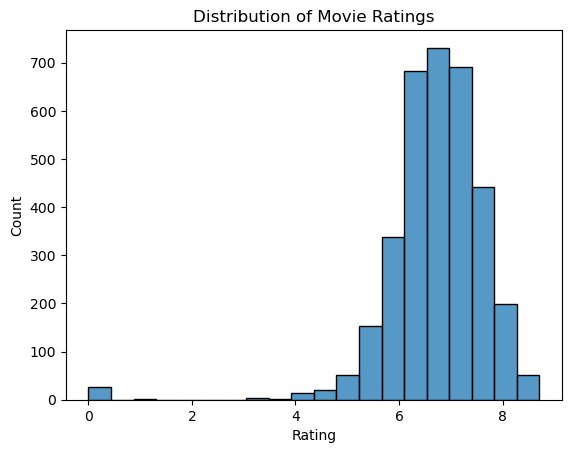

In [13]:
#Basic Information Ana
movies['log_box_office'] = np.log(movies['box_office'])
print(movies.head())
# Distribution of Movie Ratings
# 集中在6-7.5分
sns.histplot(movies['rating'], bins=20)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

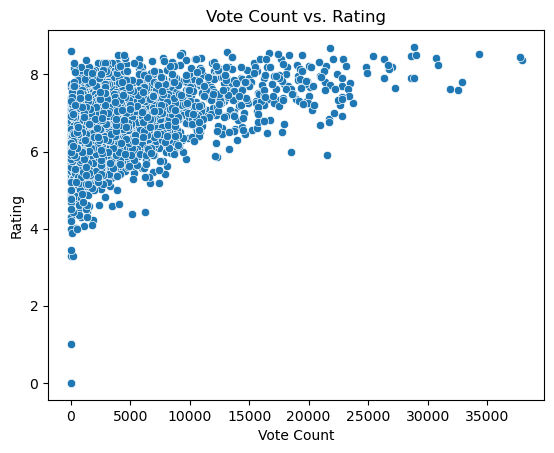

In [15]:
# Scatter plot of vote count vs. rating
# 基本符合投票数量越多评分越高（越热门评分越高）
sns.scatterplot(x='rating_count', y='rating', data=movies)
plt.title("Vote Count vs. Rating")
plt.xlabel("Vote Count")
plt.ylabel("Rating")
plt.show()


# xy轴翻转 备用
# sns.scatterplot(x='rating', y='rating_count', data=movies)
# plt.title("Vote Count vs. Rating")
# plt.xlabel("Rating")
# plt.ylabel("Vote Count")
# plt.show()

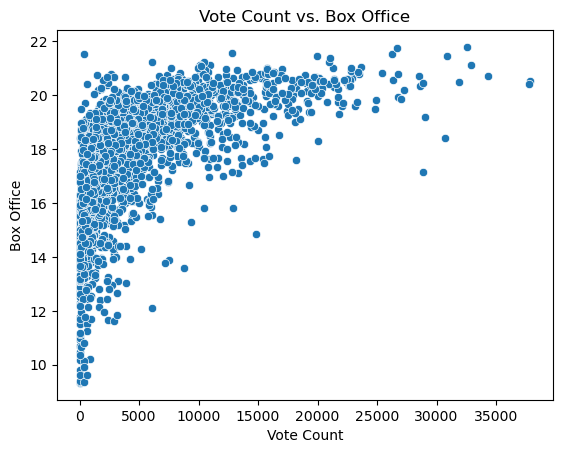

In [17]:
#评分数量和票房的关系，票房使用log后的。比评分数量-评分关系更明显（越热门评分越高）
sns.scatterplot(x='rating_count', y='log_box_office', data=movies)
plt.title("Vote Count vs. Box Office")
plt.xlabel("Vote Count")
plt.ylabel("Box Office")
plt.show()

# xy轴翻转 备用
# sns.scatterplot(x='log_box_office', y='rating_count', data=movies)
# plt.title("Vote Count vs. Box Office")
# plt.xlabel("Box Office")
# plt.ylabel("Vote Count")
# plt.show()

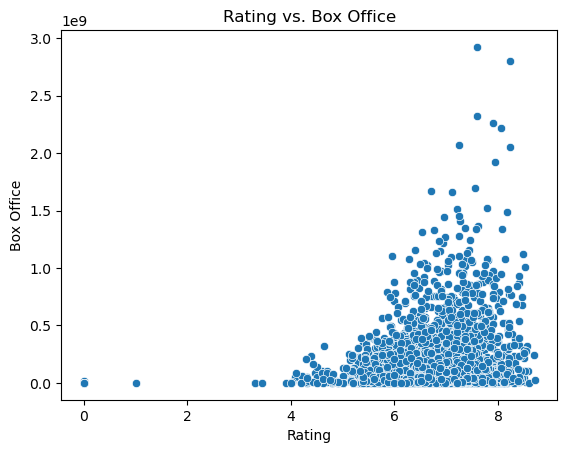

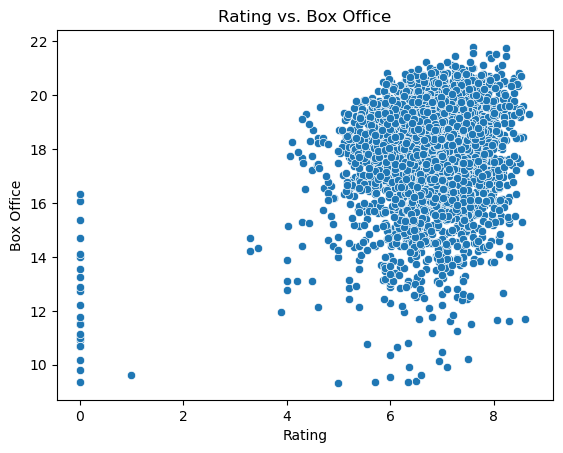

In [19]:
#评分和票房的关系，票房分别使用log前后的。发现关系不大
sns.scatterplot(x='rating', y='box_office', data=movies)
plt.title("Rating vs. Box Office")
plt.xlabel("Rating")
plt.ylabel("Box Office")
plt.show()

sns.scatterplot(x='rating', y='log_box_office', data=movies)
plt.title("Rating vs. Box Office")
plt.xlabel("Rating")
plt.ylabel("Box Office")
plt.show()

# **时间相关的趋势分析**

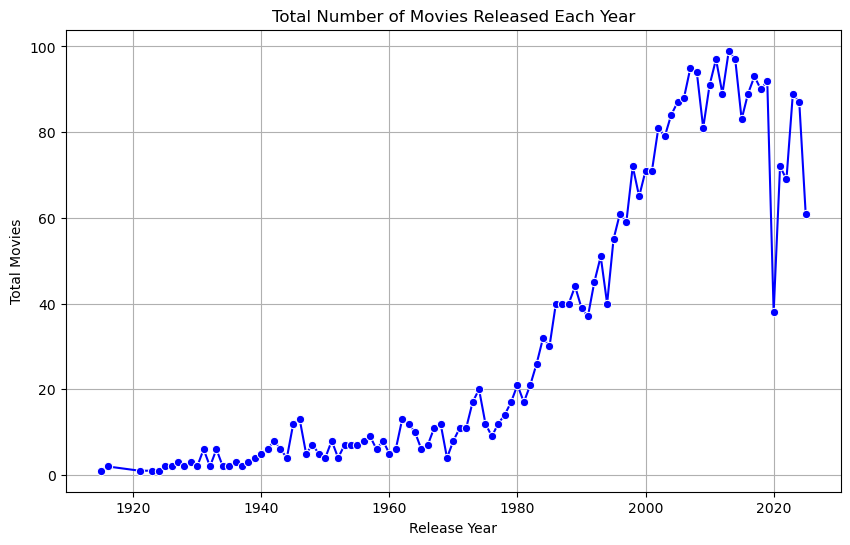

In [21]:

# Time-based Trend Ana


# 1.整体电影数量
# Group by release_year and count the number of movies
total_movies_per_year = movies.groupby('release_year').size().reset_index(name='total_movies')

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='total_movies', data=total_movies_per_year, marker='o', color='blue')
plt.title("Total Number of Movies Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Total Movies")
plt.grid()
plt.show()
# 2019年数量有明显下滑
# https://www.wipo.int/global_innovation_index/en/gii-insights-blog/2023/best-film-industries.html?utm_source=chatgpt.com
# 几个原因：
# 1.COVID;
# 2.更多人选择在家看电影-> 更多电影转为线上方式 https://www.wsj.com/business/media/how-going-to-the-movies-is-changing-in-charts-745e7e78?utm_source=chatgpt.com
# 3.经济下滑电影投入下降

             id             name
0      genre_28           Action
1      genre_12        Adventure
2      genre_16        Animation
3      genre_35           Comedy
4      genre_80            Crime
5      genre_99      Documentary
6      genre_18            Drama
7   genre_10751           Family
8      genre_14          Fantasy
9      genre_36          History
10     genre_27           Horror
11  genre_10402            Music
12   genre_9648          Mystery
13  genre_10749          Romance
14    genre_878  Science Fiction
15  genre_10770         TV Movie
16     genre_53         Thriller
17  genre_10752              War
18     genre_37          Western


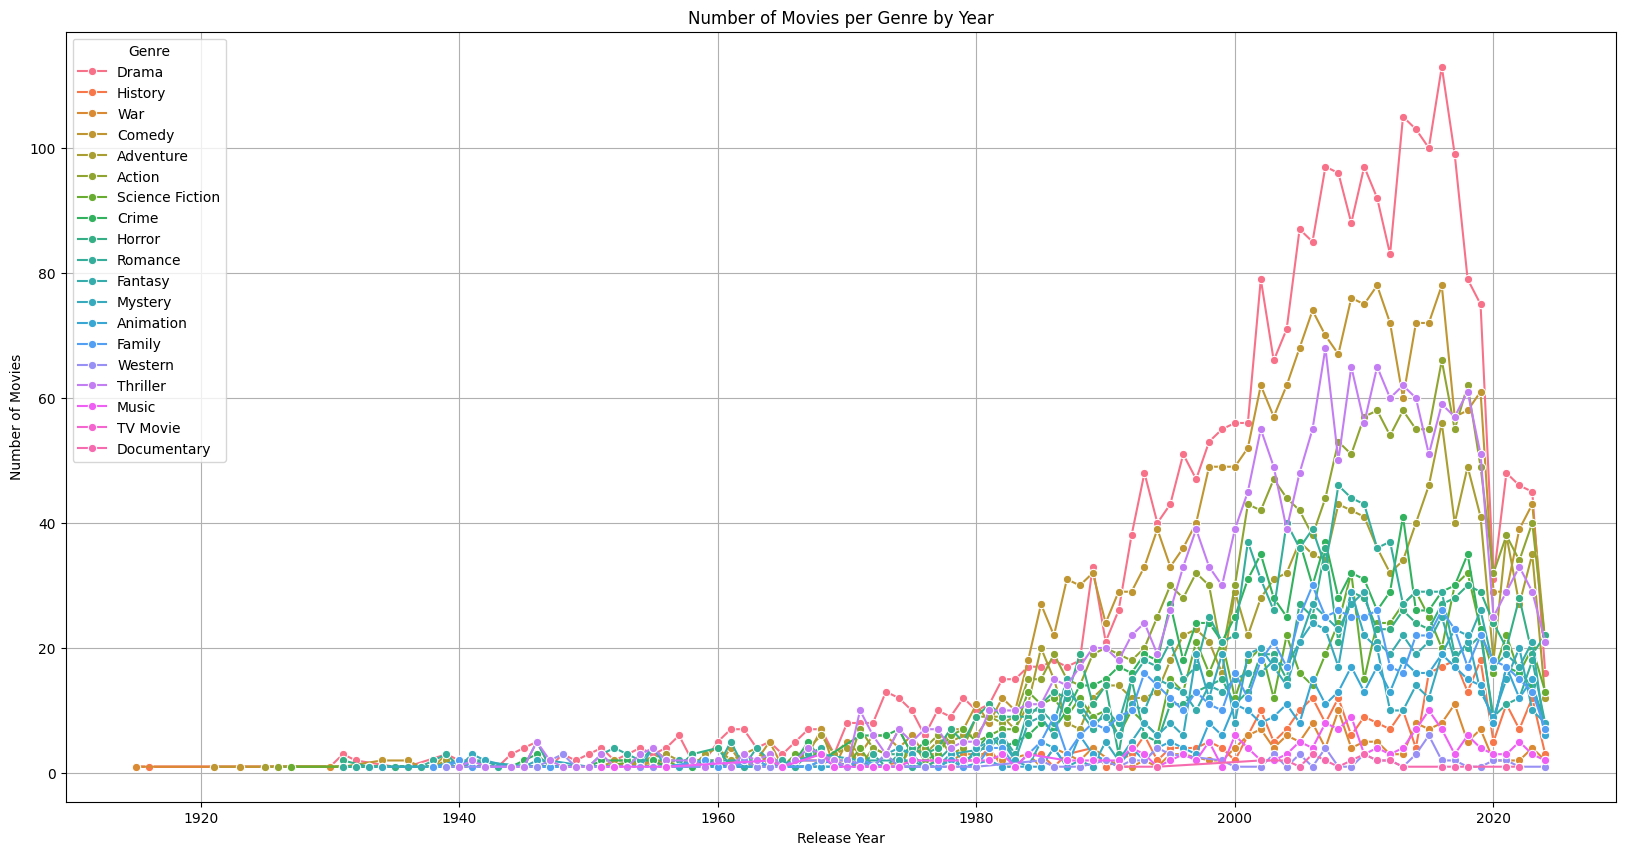

In [ ]:
# 2.每个分类的数量变化
genre_columns = [col for col in movies.columns if col.startswith('genre_')]
long_data = pd.melt(movies, id_vars=['title', 'release_year'],
                    value_vars=genre_columns,
                    var_name='genre', value_name='belongs_to_genre')

# Filter for rows where the movie belongs to the genre
long_data = long_data[long_data['belongs_to_genre'] == 1]

#replace col names
genres = pd.read_csv('https://raw.githubusercontent.com/Zzzzzzzach/503Data/refs/heads/main/output/20241113_1139/genre.csv')
genres['id'] = 'genre_' + genres['id'].astype(str)
print(genres)
id_to_name_map = genres.set_index('id')['name'].to_dict()
long_data['genre'] = long_data['genre'].map(id_to_name_map).fillna(long_data['genre'])

# # Clean up the genre column (e.g., remove "genre_" prefix)
# long_data['genre'] = long_data['genre'].str.replace('genre_', '')

# Count the number of movies per year for each genre
movie_counts = long_data.groupby(['release_year', 'genre']).size().reset_index(name='movie_count')


# Plot the trends
plt.figure(figsize=(20, 10))
sns.lineplot(x='release_year', y='movie_count', hue='genre', data=movie_counts, marker='o')
plt.title("Number of Movies per Genre by Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre")
plt.grid()
plt.show()

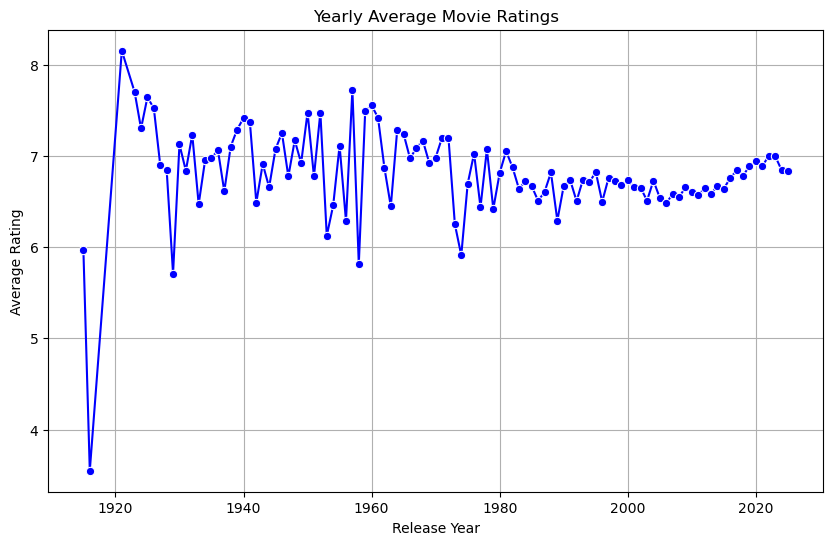

In [23]:
# 3.每年电影平均评分的总趋势

average_ratings = movies.groupby('release_year')['rating'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='rating', data=average_ratings, marker='o', color='blue')
plt.title("Yearly Average Movie Ratings")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

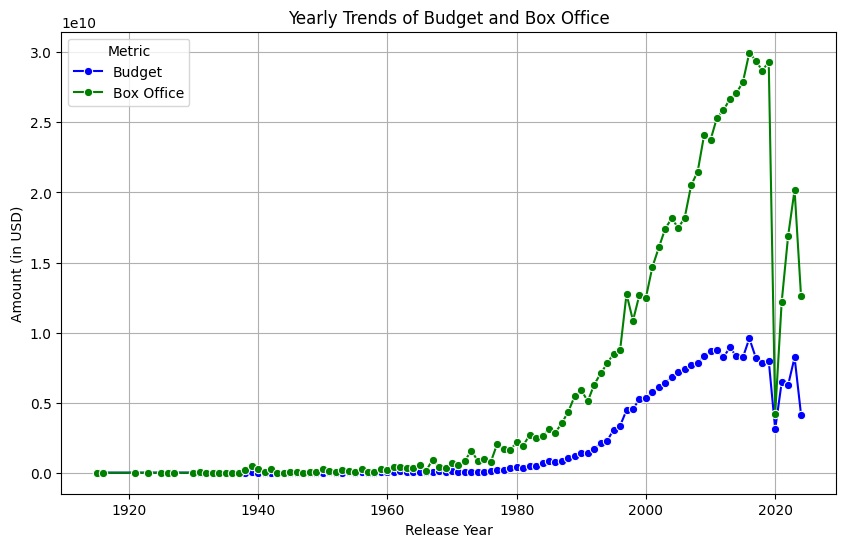

In [ ]:
# 4. 票房&预算的逐年趋势

# Group by release_year and calculate the sum (or mean) of budget and box_office for each year
yearly_data = movies.groupby('release_year')[['budget', 'box_office']].sum().reset_index()

# Plot the trends for budget and box office
plt.figure(figsize=(10, 6))

# Plot budget and box office on the same graph
sns.lineplot(x='release_year', y='budget', data=yearly_data, marker='o', label='Budget', color='blue')
sns.lineplot(x='release_year', y='box_office', data=yearly_data, marker='o', label='Box Office', color='green')

# Customize the chart
plt.title("Yearly Trends of Budget and Box Office")
plt.xlabel("Release Year")
plt.ylabel("Amount (in USD)")
plt.legend(title="Metric")
plt.grid(True)

# Show the plot
plt.show()

In [25]:
# movies=movies.drop(columns=['genre','budget','box_office'], axis=1)
# print(movies)
train_set, test_set = train_test_split(movies,test_size=0.2,random_state=42)
# movies = train_set.drop("profit", axis=1)
# movies_labels = train_set["profit"].copy()
# movies_test = test_set.drop("profit", axis=1)
# movies_labels_test = test_set["profit"].copy()

movies27=movies[movies['genre_27']==1]
print(movies27['genre_27'])
corr = movies27.corr(numeric_only=True)

corr["duration"].sort_values(ascending=False)


6217     1
6307     1
6666     1
6779     1
9314     1
        ..
25111    1
25126    1
25133    1
25170    1
25184    1
Name: genre_27, Length: 498, dtype: int64


duration          1.000000
budget            0.344779
box_office        0.322144
rating            0.290813
log_box_office    0.281251
rating_count      0.280434
profit            0.262687
release_year      0.221118
genre_18          0.190178
id                0.164086
genre_36          0.145966
genre_80          0.097902
genre_9648        0.097259
genre_12          0.089641
genre_28          0.061083
genre_53          0.054976
genre_10749       0.052049
genre_14          0.035135
genre_10752       0.022239
genre_878         0.001904
genre_10751      -0.019782
genre_10402      -0.032080
genre_35         -0.159522
genre_16               NaN
genre_27               NaN
genre_37               NaN
genre_99               NaN
Name: duration, dtype: float64

# **Duration分析**

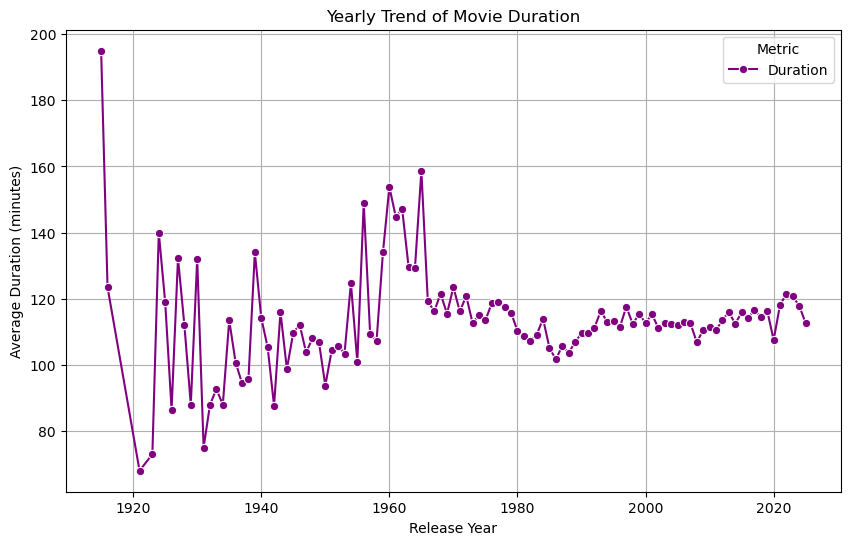

In [27]:
# 1.电影时长逐年变化趋势
# Group by release_year and calculate the average duration
duration_trend = movies.groupby('release_year')['duration'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='duration', data=duration_trend, marker='o', color='purple', label='Duration')

# Customize the chart
plt.title("Yearly Trend of Movie Duration")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.legend(title="Metric")
plt.show()


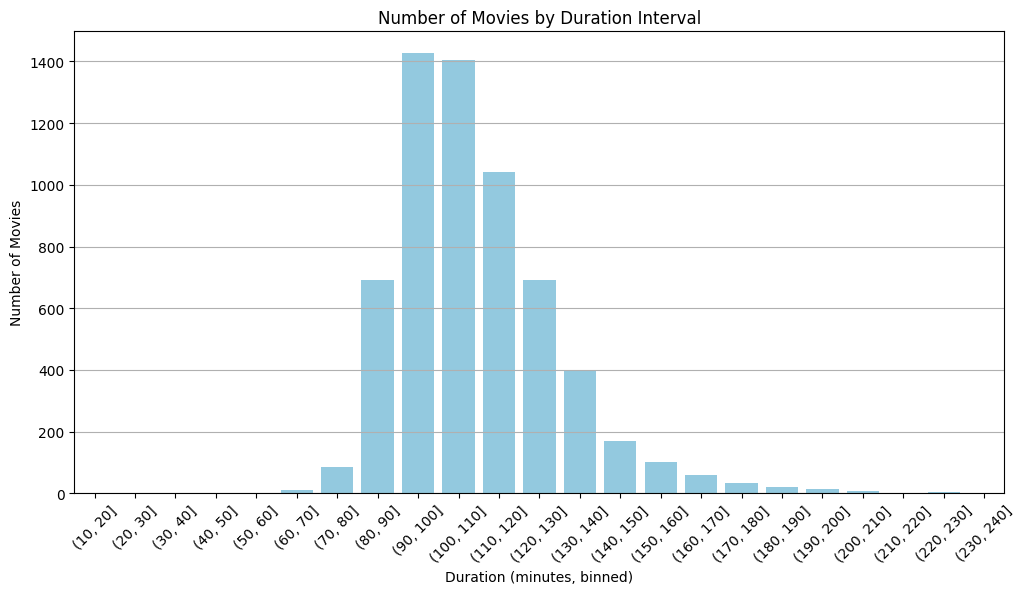

In [ ]:
# 2. 每个时间区间有多少部电影

# Step 1: Bin the durations into intervals (e.g., 10-minute bins)
movies['duration_bin'] = pd.cut(movies['duration'], bins=np.arange(10, 250, 10))

# Step 2: Count the number of movies in each duration bin
movie_counts = movies['duration_bin'].value_counts().sort_index().reset_index()
movie_counts.columns = ['duration_bin', 'movie_count']

# Convert duration_bin to a readable format
movie_counts['duration_bin_str'] = movie_counts['duration_bin'].astype(str)

# Step 3: Visualize the number of movies in each duration interval
plt.figure(figsize=(12, 6))
sns.barplot(x='duration_bin_str', y='movie_count', data=movie_counts, color='skyblue')

# Customize the plot
plt.title("Number of Movies by Duration Interval")
plt.xlabel("Duration (minutes, binned)")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/var/folders/h7/cbm50d6j0l5cdrzz3f6b82y40000gn/T/ipykernel_78054/355451831.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expected_ratings = long_data.groupby(['genre', 'duration_bin'])['rating'].mean().reset_index()


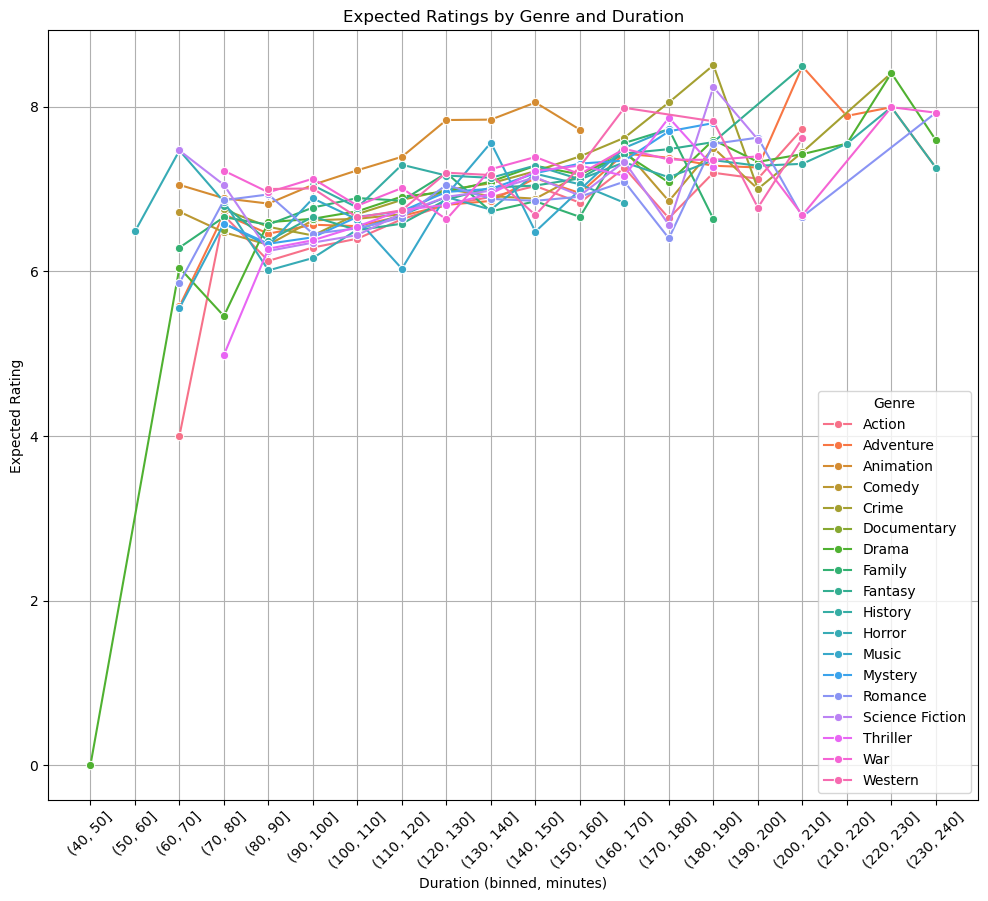

In [29]:
# 3.电影时长和评分的关系，按分类
# Step 1: Reshape the genre columns into a long format
genre_columns = [col for col in movies.columns if col.startswith('genre_')]
long_data = pd.melt(movies, id_vars=['title', 'release_year', 'rating', 'duration'],
                    value_vars=genre_columns,
                    var_name='genre', value_name='belongs_to_genre')

# Filter rows where the movie belongs to the genre
long_data = long_data[long_data['belongs_to_genre'] == 1]

# # Clean up the genre column (e.g., remove "genre_" prefix)
# long_data['genre'] = long_data['genre'].str.replace('genre_', '')

#replace col names
genres = pd.read_csv('https://raw.githubusercontent.com/Zzzzzzzach/503Data/refs/heads/main/output/20241113_1139/genre.csv')
genres['id'] = 'genre_' + genres['id'].astype(str)
# print(genres)
id_to_name_map = genres.set_index('id')['name'].to_dict()
long_data['genre'] = long_data['genre'].map(id_to_name_map).fillna(long_data['genre'])


# Step 2: Bin durations into intervals (e.g., 10-minute bins)
long_data['duration_bin'] = pd.cut(long_data['duration'], bins=np.arange(10, 250, 10))

# Step 3: Calculate the expected rating for each genre and duration bin
expected_ratings = long_data.groupby(['genre', 'duration_bin'])['rating'].mean().reset_index()

# Convert duration_bin to a readable format
expected_ratings['duration_bin_str'] = expected_ratings['duration_bin'].astype(str)

# Step 4: Plot the expected ratings
plt.figure(figsize=(12, 10))
sns.lineplot(
    data=expected_ratings,
    x='duration_bin_str',
    y='rating',
    hue='genre',
    marker='o'
)

# Customize the plot
plt.title("Expected Ratings by Genre and Duration")
plt.xlabel("Duration (binned, minutes)")
plt.ylabel("Expected Rating")
plt.xticks(rotation=45)
plt.legend(title="Genre")
plt.grid(True)
plt.show()

        id              title date_string language      genre  duration  \
17  299534  Avengers: Endgame  2019-04-24       en  12,878,28       181   

    rating  rating_count              cast1        cast2  ... genre_37  \
17   8.248         25567  Robert Downey Jr.  Chris Evans  ...        0   

   genre_53  genre_80  genre_878 genre_9648  genre_99        profit  \
17        0         0          1          0         0  2.443439e+09   

    release_year  log_box_office  duration_bin  
17          2019       21.752685    (180, 190]  

[1 rows x 38 columns]


<ipython-input-364-c096a7c4a617>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expected_box_office = long_data.groupby(['genre', 'duration_bin'])['box_office'].mean().reset_index()


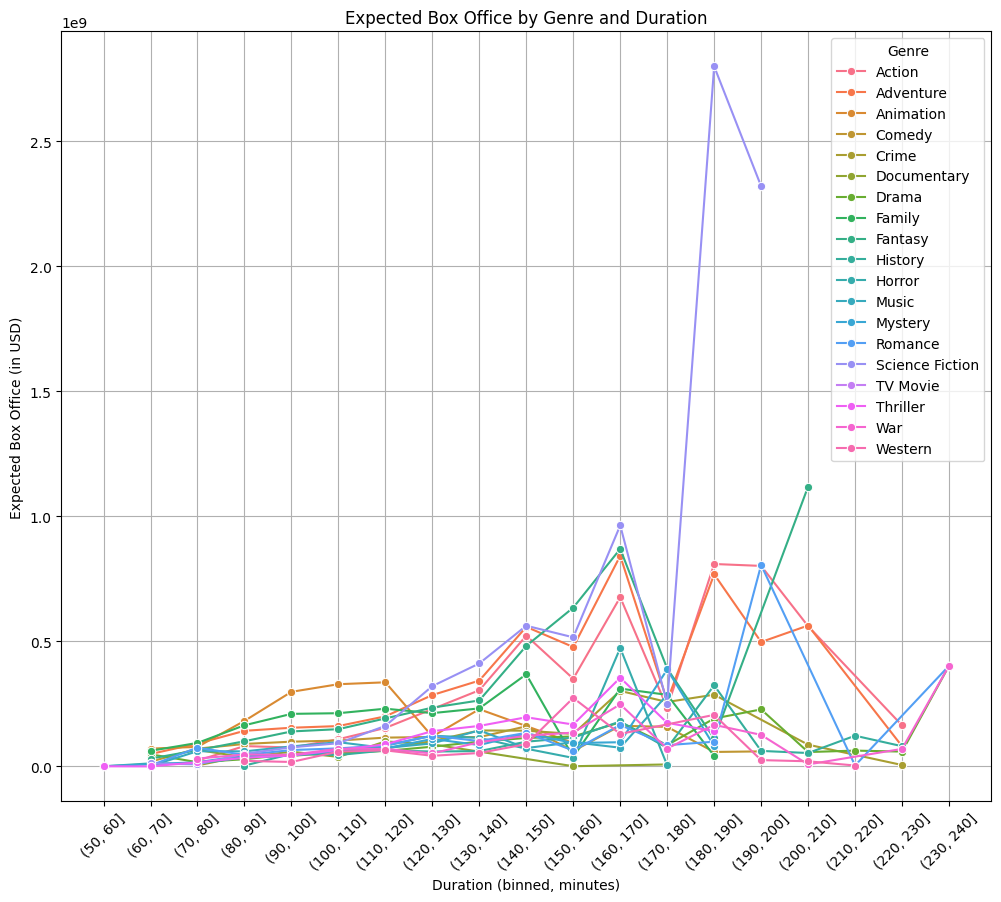

In [ ]:
# 3. 分段时长与票房收入，按分类
# 科幻片两个高点是因为这个时段只有一部片子，分别是Avengers: Endgame 和 Avatar: The Way of Water
# 实际上票房最高的Avatar，时长在160-170之间，这个区间有7部片子，被平均掉了

# Step 1: Reshape the genre columns into a long format
genre_columns = [col for col in movies.columns if col.startswith('genre_')]
long_data = pd.melt(movies, id_vars=['title', 'release_year', 'box_office', 'duration'],
                    value_vars=genre_columns,
                    var_name='genre', value_name='belongs_to_genre')

# Filter rows where the movie belongs to the genre
long_data = long_data[long_data['belongs_to_genre'] == 1]

long_data['genre'] = long_data['genre'].map(id_to_name_map).fillna(long_data['genre'])

# Step 2: Bin durations into intervals (e.g., 10-minute bins)
long_data['duration_bin'] = pd.cut(long_data['duration'], bins=np.arange(10, 250, 10))
print(movies[(movies['duration'] > 180) & (movies['duration'] <= 190) & (movies['genre_878'] == 1)])


# Step 3: Calculate the expected box office for each genre and duration bin
expected_box_office = long_data.groupby(['genre', 'duration_bin'])['box_office'].mean().reset_index()

# Convert duration_bin to a readable format
expected_box_office['duration_bin_str'] = expected_box_office['duration_bin'].astype(str)

# Step 4: Plot the expected box office
plt.figure(figsize=(12, 10))
sns.lineplot(
    data=expected_box_office,
    x='duration_bin_str',
    y='box_office',
    hue='genre',
    marker='o'
)

# Customize the plot
plt.title("Expected Box Office by Genre and Duration")
plt.xlabel("Duration (binned, minutes)")
plt.ylabel("Expected Box Office (in USD)")
plt.xticks(rotation=45)
plt.legend(title="Genre")
plt.grid(True)
plt.show()

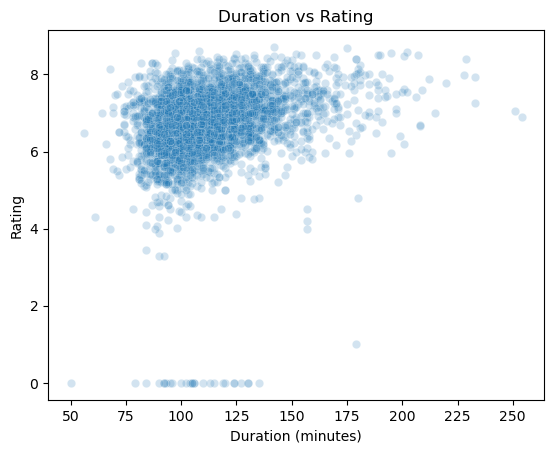

In [31]:
# Delete unreasonable durations
movies = movies[(movies['duration'] > 30) & (movies['duration'] < 300)]
# Duration vs Rating
sns.scatterplot(x='duration', y='rating', data=movies, alpha=0.2)
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

       duration  box_office     Genre  Present
0           195  11000000.0  genre_18        1
1           197   1750000.0  genre_18        1
2            50    102768.0  genre_18        1
3            68   5450000.0  genre_18        1
4            73   1500000.0  genre_18        0
...         ...         ...       ...      ...
61339        93    876150.0  genre_27        0
61340        81    196237.0  genre_27        1
61341       110  34536061.0  genre_27        0
61342       101   2482071.0  genre_27        0
61343       144  54586117.0  genre_27        0

[61344 rows x 4 columns]
             id             name
0      genre_28           Action
1      genre_12        Adventure
2      genre_16        Animation
3      genre_35           Comedy
4      genre_80            Crime
5      genre_99      Documentary
6      genre_18            Drama
7   genre_10751           Family
8      genre_14          Fantasy
9      genre_36          History
10     genre_27           Horror
11  genre_1040

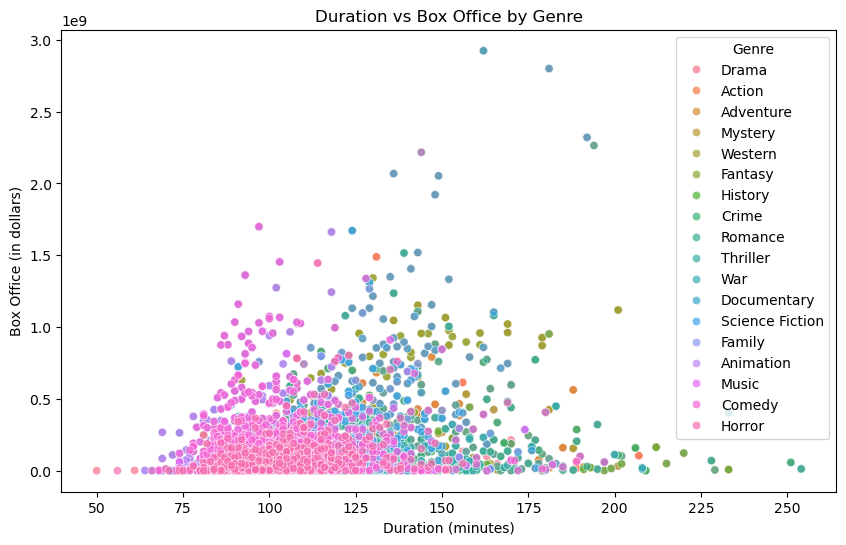

In [35]:
# Duration vs box_office
# movies18=movies[movies['genre_27']==1]
# sns.scatterplot(x='duration', y='box_office', data=movies18, alpha=0.1)
# plt.title('Duration vs Box Office')
# plt.xlabel('Duration (minutes)')
# plt.ylabel('Box Office (in dollars)')
# plt.show()
selected_genres = ['genre_18', 'genre_28', 'genre_12',  'genre_9648', 'genre_37',  'genre_14',
                   'genre_36', 'genre_80','genre_10749','genre_53', 'genre_10752',
                   'genre_99', 'genre_878', 'genre_10751', 'genre_16', 'genre_10402', 'genre_35', 'genre_27']  # 替换为实际的 genre 列名
movies_selected = movies[selected_genres + ['duration', 'box_office']]  # 筛选需要的列

# Melt 数据以便绘制
movies_melted = movies_selected.melt(
    id_vars=['duration', 'box_office'],
    value_vars=selected_genres,
    var_name='Genre',
    value_name='Present'
)

print(movies_melted)
# 只保留 'Present' 为 1 的记录（表示电影属于该 genre）
movies_melted = movies_melted[movies_melted['Present'] == 1]



#replace col names
genres = pd.read_csv('https://raw.githubusercontent.com/Zzzzzzzach/503Data/refs/heads/main/output/20241113_1139/genre.csv')
genres['id'] = 'genre_' + genres['id'].astype(str)
print(genres)
id_to_name_map = genres.set_index('id')['name'].to_dict()
movies_melted['Genre'] = movies_melted['Genre'].map(id_to_name_map).fillna(movies_melted['Genre'])

# 绘制图形
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='duration',
    y='box_office',
    hue='Genre',
    data=movies_melted,
    alpha=0.7
)

# 设置图表标题和坐标轴标签
plt.title('Duration vs Box Office by Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Box Office (in dollars)')
plt.legend(title='Genre')
plt.show()

In [37]:
correlation_rating = movies['duration'].corr(movies['rating'])
correlation_box_office = movies['duration'].corr(movies['box_office'])

print(f"Correlation between Duration and Rating: {correlation_rating}")
print(f"Correlation between Duration and Box Office: {correlation_box_office}")

Correlation between Duration and Rating: 0.2701292650422615
Correlation between Duration and Box Office: 0.20606632782753795


RMSE: 0.9712787612228366
RMSE: 0.9910721802251371
RMSE: 0.9885209025202374
RMSE: 0.9707084983102968


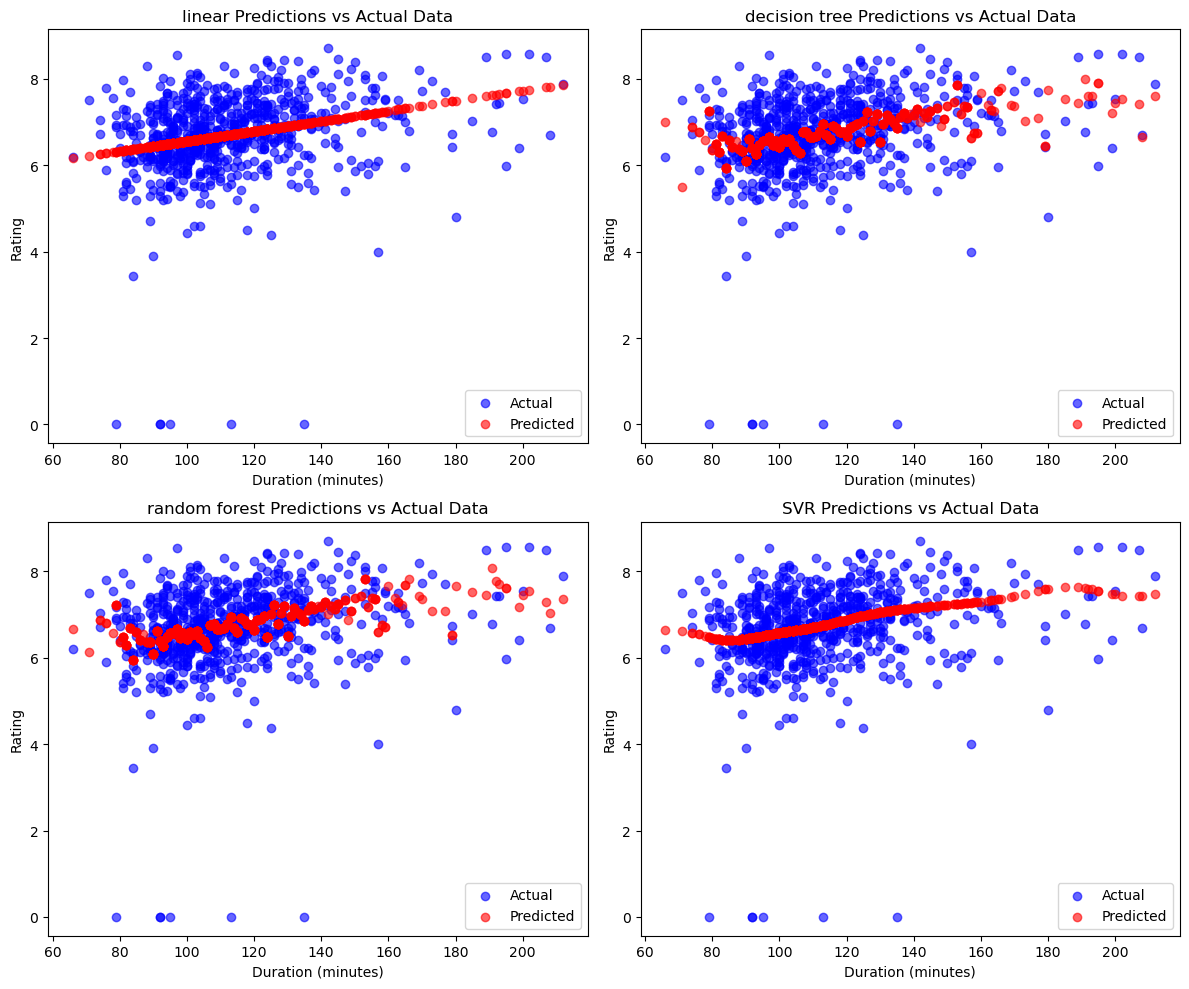

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Prepare the data, Predict duration vs rating
X = movies[['duration']]
y = movies['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_1 = lin_reg.predict(X_test)

# Print
print("RMSE:", root_mean_squared_error(y_test, y_pred_1))

# DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_2 = tree_reg.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred_2))

# RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_3 = rf_reg.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred_3))

# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_4= svr.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred_4))

# Four prediction results, and titles for each model
predictions = [y_pred_1, y_pred_2, y_pred_3, y_pred_4]
titles = ["linear", "decision tree", "random forest", "SVR"]

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 网格的子图
axs = axs.flatten()  # 将子图数组展平，便于循环

for i in range(4):
    axs[i].scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
    axs[i].scatter(X_test, predictions[i], color='red', label='Predicted', alpha=0.6)
    axs[i].set_title(f'{titles[i]} Predictions vs Actual Data')
    axs[i].set_xlabel('Duration (minutes)')
    axs[i].set_ylabel('Rating')
    axs[i].legend()

# 调整布局
plt.tight_layout()
plt.show()

In [ ]:
# # Prepare the data, Predict duration vs box_office
# X = movies[['duration']]
# y = movies['box_office']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # RandomForestRegressor
# rf_reg = RandomForestRegressor(random_state=42)
# rf_reg.fit(X_train, y_train)

# # Predict
# y_pred1 = rf_reg.predict(X_test)

# # Print
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))
# # Support Vector Regression
# svr = SVR(kernel='rbf')
# svr.fit(X_train, y_train)
# y_pred2= svr.predict(X_test)
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))

# **不同类别ROI分析**

In [41]:
movies = pd.read_csv('https://raw.githubusercontent.com/Zzzzzzzach/503Data/refs/heads/main/output/20241113_1139/movies.csv')

movies.drop('source_genre',axis=1,inplace=True)
# Extract release year
movies['date_string'] = pd.to_datetime(movies['date_string'], errors='coerce')
movies['release_year'] = movies['date_string'].dt.year


movies['budget'] = movies['budget'].replace(0, np.nan)
movies['box_office'] = movies['box_office'].replace(0, np.nan)

movies = movies[(movies['release_year'] >= 2014)]
movies = movies[(movies['budget'] >= 500000)]

movies = movies.dropna(subset=['box_office', 'budget'])
# Handle genre column with One-Hot Encoding
dummies = movies['genre'].str.get_dummies(sep=',')
dummies.columns = [f"genre_{col}" for col in dummies.columns]
movies = movies.join(dummies)

print(movies)

          id                    title date_string language           genre  \
1     157336             Interstellar  2014-11-05       en       12,18,878   
4     293660                 Deadpool  2016-02-09       en        28,12,35   
6     299536   Avengers: Infinity War  2018-04-25       en       12,28,878   
8     118340  Guardians of the Galaxy  2014-07-30       en       28,878,12   
15    475557                    Joker  2019-10-01       en        80,53,18   
...      ...                      ...         ...      ...             ...   
9915  619803              The Roundup  2022-05-18       ko     28,80,35,53   
9920  495193                    Benji  2018-03-16       en  18,35,10751,80   
9921  235260               Son of God  2014-02-28       en              18   
9964  829051          About My Father  2023-05-25       en              35   
9969  541660                     Loro  2018-09-13       it              18   

      duration  rating  rating_count                 cast1     

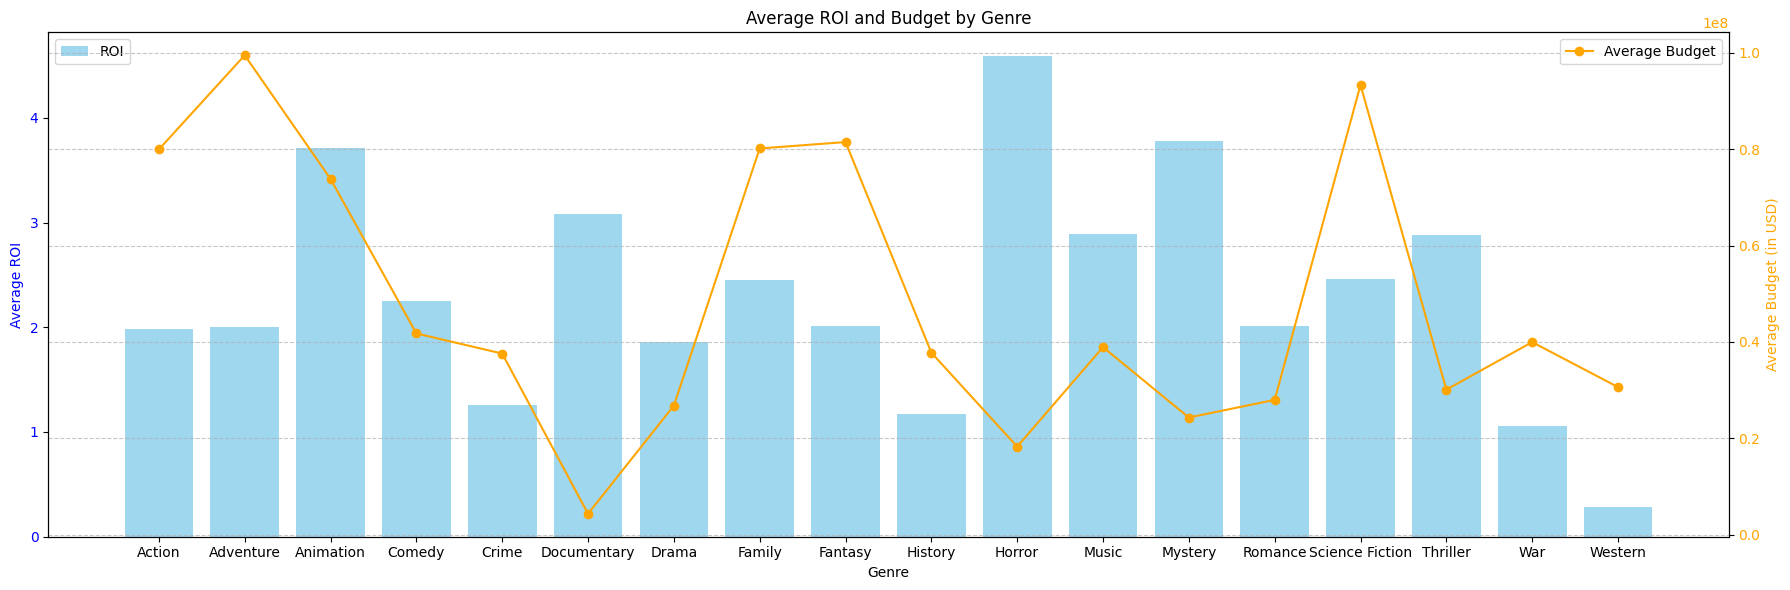

In [ ]:
movies['profit'] = movies['box_office'] - movies['budget']
movies['roi'] = (movies['box_office'] - movies['budget']) / movies['budget']

# Step 1: Reshape the genre columns into a long format
genre_columns = [col for col in movies.columns if col.startswith('genre_')]
long_data = pd.melt(movies, id_vars=['title', 'release_year', 'duration', 'roi', 'budget'],
                    value_vars=genre_columns,
                    var_name='genre', value_name='belongs_to_genre')

# Filter rows where the movie belongs to the genre
long_data = long_data[long_data['belongs_to_genre'] == 1]

#replace col names
genres = pd.read_csv('https://raw.githubusercontent.com/Zzzzzzzach/503Data/refs/heads/main/output/20241113_1139/genre.csv')
genres['id'] = 'genre_' + genres['id'].astype(str)
# print(genres)
id_to_name_map = genres.set_index('id')['name'].to_dict()
long_data['genre'] = long_data['genre'].map(id_to_name_map).fillna(long_data['genre'])

# Step 2: Calculate the mean ROI for each genre
# genre_roi = long_data.groupby('genre')['roi'].mean().reset_index()

genre_stats = long_data.groupby('genre').agg(
    avg_roi=('roi', 'mean'),
    avg_budget=('budget', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(18, 6))


# Plot ROI as bars
ax1.bar(genre_stats['genre'], genre_stats['avg_roi'], color='skyblue', label='ROI', alpha=0.8)
ax1.set_xlabel("Genre")
ax1.set_ylabel("Average ROI", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Average ROI and Budget by Genre")

# Add secondary y-axis for budget
ax2 = ax1.twinx()
ax2.plot(genre_stats['genre'], genre_stats['avg_budget'], color='orange', marker='o', label='Average Budget')
ax2.set_ylabel("Average Budget (in USD)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add grid and legend
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# print(genre_roi)
# Step 3: Visualize the ROI for each genre
# plt.figure(figsize=(20, 6))
# sns.barplot(x='genre', y='roi', data=genre_roi, palette='viridis')

# # Customize the plot
# plt.title("Average ROI by Genre")
# plt.xlabel("Genre")
# plt.ylabel("Average ROI")
# plt.grid(axis='y')
# plt.show()


# 电影票房预测

In [43]:
movies = pd.read_csv('https://raw.githubusercontent.com/Zzzzzzzach/503Data/refs/heads/main/output/20241113_1139/movies.csv')

movies.drop('source_genre',axis=1,inplace=True)
# Extract release year
movies['date_string'] = pd.to_datetime(movies['date_string'], errors='coerce')
movies['release_year'] = movies['date_string'].dt.year


movies['budget'] = movies['budget'].replace(0, np.nan)
movies['box_office'] = movies['box_office'].replace(0, np.nan)

movies = movies[(movies['release_year'] >= 2014)]

movies = movies.dropna(subset=['box_office', 'budget'])

movies['log_box_office'] = np.log1p(movies['box_office'])

# 对分类进行拆分和编码
movies = movies.assign(genre=movies['genre'].str.split(',')).explode('genre')
movies = pd.get_dummies(movies, columns=['genre'], prefix='genre')

movies = pd.get_dummies(movies, columns=['language'], prefix='lang')

# 添加导演票房特征
director_mean_revenue = movies.groupby("director")['box_office'].mean()
movies['director_mean_revenue'] = movies["director"].map(director_mean_revenue)

print(type(director_mean_revenue))
print(director_mean_revenue)
# 添加演员票房特征
cast_data = movies.melt(id_vars=['box_office'], value_vars=['cast1', 'cast2', 'cast3'],
                      var_name='cast_order', value_name='casts')
# 按演员分组计算平均票房
actor_mean_revenue = cast_data.groupby('casts')['box_office'].mean().reset_index()
actor_mean_revenue.rename(columns={'box_office': 'avg_box_office'}, inplace=True)
print(type(actor_mean_revenue))
print(actor_mean_revenue)


# 创建映射字典
actor_revenue_map = actor_mean_revenue.set_index('casts')['avg_box_office'].to_dict()

# 映射到原始数据中
movies['cast1_mean_revenue'] = movies['cast1'].map(actor_revenue_map)
movies['cast2_mean_revenue'] = movies['cast2'].map(actor_revenue_map)
movies['cast3_mean_revenue'] = movies['cast3'].map(actor_revenue_map)

print(movies)

print(movies.isnull().sum())

movies = movies.dropna(subset=['cast1_mean_revenue', 'cast2_mean_revenue', 'cast3_mean_revenue'])

print("f=====")
print(movies.isnull().sum())
print(movies)


<class 'pandas.core.series.Series'>
director
Aaron Horvath         2.864654e+07
Aaron Moorhead        9.564250e+05
Aaron Nee             1.929077e+08
Aaron Sorkin          2.969572e+07
Abby Kohn             9.453943e+07
                          ...     
Zoe Lister-Jones      2.300000e+06
Zoë Kravitz           4.355547e+07
Álex de la Iglesia    3.662671e+06
Ángel Manuel Soto     1.307881e+08
Éric Toledano         8.034353e+06
Name: box_office, Length: 1159, dtype: float64
<class 'pandas.core.frame.DataFrame'>
                casts  avg_box_office
0             50 Cent    1.984204e+07
1          A$AP Rocky    1.798678e+07
2                ABRA    2.900000e+06
3          Aamir Khan    2.286800e+08
4        Aarif Rahman    2.542122e+08
...               ...             ...
2695      Érica Rivas    3.147889e+07
2696   Óscar Barberán    3.340309e+07
2697    Óscar Jaenada    1.191000e+08
2698      İlker Aksum    2.800000e+07
2699  İsmail Hacıoğlu    2.110742e+07

[2700 rows x 2 columns]
    

In [45]:
# 平均票房前十的导演和演员

# 导演前几个比较有代表性
# 演员的电影代表性不高

top_10_directors = director_mean_revenue.sort_values(ascending=False).head(10)
print(top_10_directors)
# Sort by avg_box_office in descending order and output the top 10 rows
top_10_actors = actor_mean_revenue.sort_values(by='avg_box_office', ascending=False).head(10)
print(top_10_actors)

director
James Cameron      2.320250e+09
Kelsey Mann        1.682636e+09
J.J. Abrams        1.571184e+09
Jennifer Lee       1.453683e+09
Joe Russo          1.440422e+09
Joss Whedon        1.405404e+09
Michael Jelenic    1.362000e+09
Ryan Fleck         1.131416e+09
Jon Favreau        1.112646e+09
Jon Watts          1.056857e+09
Name: box_office, dtype: float64
                   casts  avg_box_office
1769          Maya Hawke    1.682636e+09
1429  Kensington Tallman    1.682636e+09
1023         Irrfan Khan    1.671537e+09
1265         John Oliver    1.663000e+09
430        Carrie Fisher    1.491689e+09
1869      Monica Barbaro    1.488733e+09
1009        Idina Menzel    1.453683e+09
757          Emma Corrin    1.336816e+09
2164   Robert Downey Jr.    1.278459e+09
554      Craig T. Nelson    1.242805e+09


forest RMSE: 0.3243725284934464


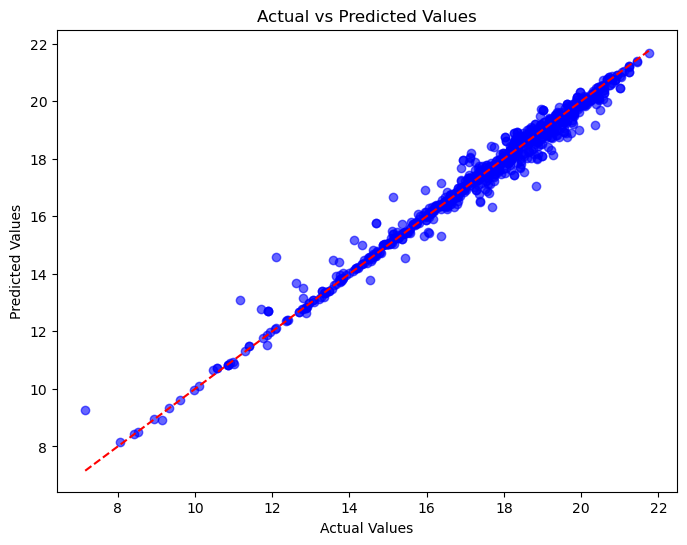

In [47]:
# 选择特征列
features = ['budget', 'duration', 'director_mean_revenue',
            'cast1_mean_revenue', 'cast2_mean_revenue', 'cast3_mean_revenue']

genre_columns = [col for col in movies.columns if col.startswith('genre_')]


features.extend(genre_columns)
X = movies[features]

# 目标变量
y = movies['log_box_office']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# 构建随机森林模型
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"forest RMSE: {rmse}")

import matplotlib.pyplot as plt
import numpy as np

# 真实值 vs. 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 对角线
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()




In [49]:
cast1_name = "Paul Mescal"
cast2_name = "Denzel Washington"
cast3_name = "Pedro Pascal"
director_name = "Ridley Scott"


def get_actor_mean_revenue(actor_name, actor_mean_revenue):
	result = actor_mean_revenue.loc[actor_mean_revenue["casts"] == actor_name, 'avg_box_office']
	actor_mean_revenue = result.iloc[0] if not result.empty else 0
	return actor_mean_revenue

def get_director_mean_revenue(director_name):
	return director_mean_revenue.get(director_name, 0)

#director_mean_revenue
director_revenue = get_director_mean_revenue(director_name)
#cast1_mean_revenue
cast1_revenue = get_actor_mean_revenue(cast1_name, actor_mean_revenue)
#cast2_mean_revenue
cast2_revenue = get_actor_mean_revenue(cast2_name, actor_mean_revenue)
#cast3_mean_revenue
cast3_revenue = get_actor_mean_revenue(cast3_name, actor_mean_revenue)

genre_dict = {}
for genre in genre_columns:
	genre_dict[genre] = 0
genre_dict["genre_28"] = 1
genre_dict["genre_12"] = 1

movie_info_dict = {
    'budget': [310000000],
    'duration': [148],
    'director_mean_revenue':[director_revenue],
    'cast1_mean_revenue': [cast1_revenue],
    'cast2_mean_revenue': [cast2_revenue],
    'cast3_mean_revenue': [cast3_revenue]
}
movie_info_dict.update(genre_dict)
new_movie = pd.DataFrame(movie_info_dict)

# print(new_movie)

# # 示例新电影数据
# new_movie = pd.DataFrame({
#     'budget': [310000000],
#     'duration': [148],
#     'director_mean_revenue':[director_revenue],
#     'cast1_mean_revenue': [cast1_revenue],
#     'cast2_mean_revenue': [cast2_revenue],
#     'cast3_mean_revenue': [cast3_revenue],
#     'genre_18':[0],
# 		'genre_28':[1],
# 		'genre_12':[1],
# 		'genre_9648':[0],
# 		'genre_37':[0],
# 		'genre_14':[0],
# 		'genre_36':[0],
# 		'genre_80':[0],
# 		'genre_10749':[0],
# 		'genre_53':[0],
# 		'genre_10752':[0],
# 		'genre_99':[0],
# 		'genre_878':[0],
# 		'genre_10751':[0],
# 		'genre_16':[0],
# 		'genre_10402':[0],
# 		'genre_35':[0],
# 		'genre_27':[0],
# })

# print(new_movie)

# 预测票房（对数值）
log_revenue_pred = model.predict(new_movie)
# print(log_revenue_pred)
revenue_pred = np.expm1(log_revenue_pred)  # 转换回实际票房
print(f"Predicted Revenue: ${revenue_pred[0]:,.2f}")

Predicted Revenue: $160,976,743.17


In [51]:
# RED One
cast1_name = "Dwayne Johnson"
cast2_name = "Chris Evans"
cast3_name = "J.K. Simmons"
director_name = "Jake Kasdan"


def get_actor_mean_revenue(actor_name, actor_mean_revenue):
	result = actor_mean_revenue.loc[actor_mean_revenue["casts"] == actor_name, 'avg_box_office']
	actor_mean_revenue = result.iloc[0] if not result.empty else 0
	return actor_mean_revenue

def get_director_mean_revenue(director_name):
	return director_mean_revenue.get(director_name, 0)

#director_mean_revenue
director_revenue = get_director_mean_revenue(director_name)
#cast1_mean_revenue
cast1_revenue = get_actor_mean_revenue(cast1_name, actor_mean_revenue)
#cast2_mean_revenue
cast2_revenue = get_actor_mean_revenue(cast2_name, actor_mean_revenue)
#cast3_mean_revenue
cast3_revenue = get_actor_mean_revenue(cast3_name, actor_mean_revenue)

genre_dict = {}
for genre in genre_columns:
	genre_dict[genre] = 0
genre_dict["genre_28"] = 1
genre_dict["genre_35"] = 1
genre_dict["genre_14"] = 1

movie_info_dict = {
    'budget': [250000000],
    'duration': [124],
    'director_mean_revenue':[director_revenue],
    'cast1_mean_revenue': [cast1_revenue],
    'cast2_mean_revenue': [cast2_revenue],
    'cast3_mean_revenue': [cast3_revenue]
}
movie_info_dict.update(genre_dict)
new_movie = pd.DataFrame(movie_info_dict)
# print(new_movie)

# 预测票房（对数值）
log_revenue_pred = model.predict(new_movie)
# print(log_revenue_pred)
revenue_pred = np.expm1(log_revenue_pred)  # 转换回实际票房
print(f"Predicted Revenue: ${revenue_pred[0]:,.2f}")


# 预测不准确的问题分析：
# 1.数据集本身小，筛选后几千条电影
# 2.演员只取了前三个，导致

Predicted Revenue: $21,193,368.83


Neural Network RMSE: 315396.90199084656


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


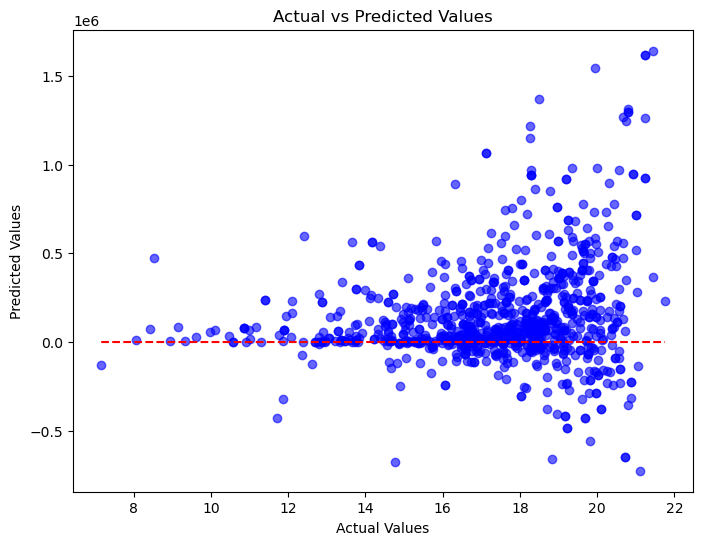

In [53]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 多层感知机模型
model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
print(f"Neural Network RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")



# 真实值 vs. 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 对角线
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()





/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Bayesian Ridge RMSE: 1.7496518351782577


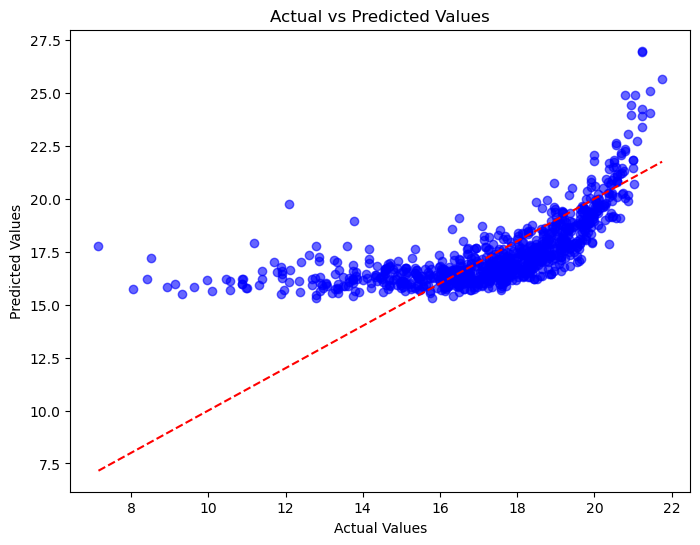

In [54]:

from sklearn.linear_model import BayesianRidge


# 贝叶斯回归模型
model = BayesianRidge()
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
print(f"Bayesian Ridge RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

# 真实值 vs. 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 对角线
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



SVM RMSE: 1.4701014620295474


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


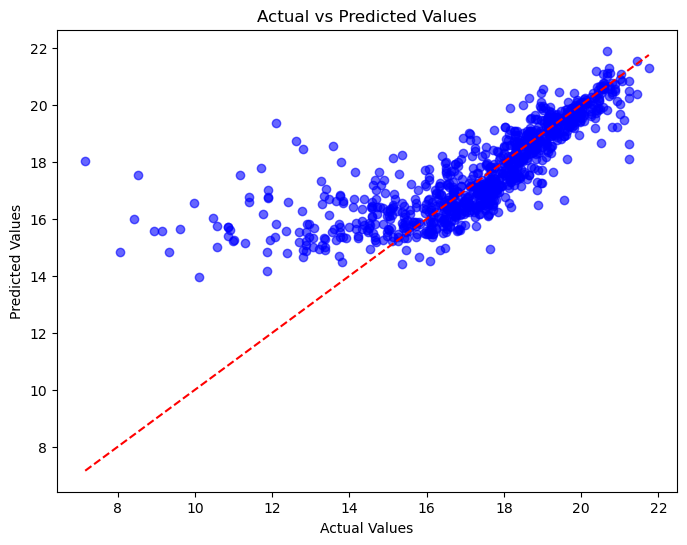

In [57]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM 回归
model = SVR(kernel='rbf', C=10, epsilon=0.1)
model.fit(X_train_scaled, y_train)

# 预测与评估
y_pred = model.predict(X_test_scaled)
print(f"SVM RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

# 真实值 vs. 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 对角线
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
